In [1]:
#Rebuild NEURON-based Cell
import numpy as np
from neuron import h
import simulation as sim
import matplotlib.pyplot as plt
import stimulus_pulse as sp
import extracellular as ex
import helperFuncs as hf

for sec in h.allsec():
   h.delete_section(sec=sec)

--No graphics will be displayed.


In [2]:
RGC = sim.Local_Cell()
filename = 'cell_param_files/params_35_v2.csv'
RGC.build_cell(filename, 'mammalian_spike_35')
x_shift = -1000 + 997.8304687738416
# RGC.shift_cell_x_y_z(0+x_shift,0,0)

After any change to cell geometry or nseg, be sure to invoke setpointers()


# Convert to SWC

In [3]:
from hoc2swc import neuron2swc

neuron2swc("n_rgc.swc")

Wrote cell 0 to n_rgc.swc


# Simplify and Clean the SWC File

In [4]:
import jaxley as jx
from jaxley.morphology import morph_delete, morph_connect
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [5]:
cell = jx.read_swc(
    "n_rgc.swc", 
    ncomp = 20, 
    min_radius= 0.005,
    assign_groups=True)

# Visualize

<Axes: >

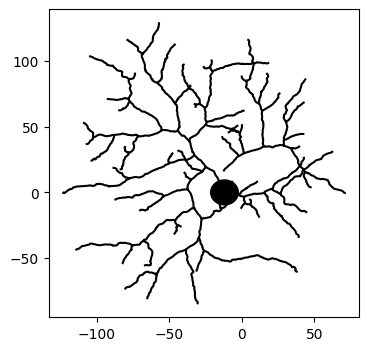

In [10]:
cell.compute_xyz()
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
cell.vis(ax=ax)

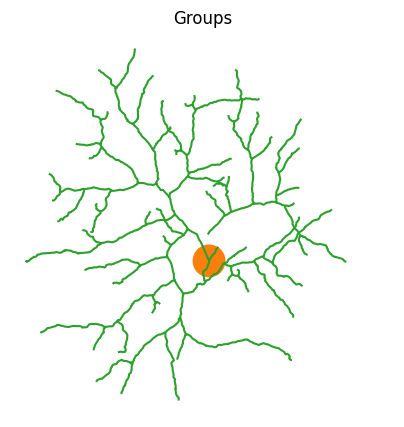

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
colors = plt.cm.tab10.colors
cell.basal.vis(ax=ax, color=colors[2])
cell.soma.vis(ax=ax, color=colors[1])
# cell.axon.vis(ax=ax, color=colors[0])

plt.axis("off")
plt.title("Groups")
plt.axis("square")
plt.show()

In [6]:
params = pd.read_csv('cell_param_files/params_35_v2.csv')
mod_file = 'mammalian_spike_35'


# Build Biophysics For Dendrites

['local_cell_index', 'local_branch_index', 'local_comp_index', 'length', 'radius', 'axial_resistivity', 'capacitance', 'v', 'x', 'y', 'z', 'basal', 'soma', 'Leak', 'Leak_gLeak', 'Leak_eLeak', 'mammalian_spike_35', 'gnabar_mammalian_spike_35', 'gkbar_mammalian_spike_35', 'gcabar_mammalian_spike_35', 'gkcbar_mammalian_spike_35', 'ena', 'ek', 'eca', 'm', 'h', 'n', 'c', 'global_cell_index', 'global_branch_index', 'global_comp_index', 'controlled_by_param']


# Build Biophysics For Soma


# Build Biophysics For Axon Hillcock


# Build Morphology For Axon Hillcock



# Build Biophysics For SOCB


# Build Morphology For SOCB


# Build Biophysics For NR


# Build Morphology For NR


# Build Biophysics For Distal Axon


# Build Morphology For Distal Axon
